In [57]:
import pandas as pd
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('D:/Learning/Satelite-object-detection/submission_0319_nms03.csv')
df.head(3)

file_name  class_id  confidence  point1_x  point1_y  point2_x  point2_y  \
0     0.png         3       0.183     197.0    1290.0     328.0    1290.0   
1     0.png         4       0.800     249.0    1956.0     273.0    1996.0   
2     0.png         4       0.997     320.0    2745.0     427.0    2947.0   

   point3_x  point3_y  point4_x  point4_y  
0     328.0    1532.0     197.0    1532.0  
1      89.0    2077.0      65.0    2037.0  
2     380.0    2978.0     273.0    2776.0

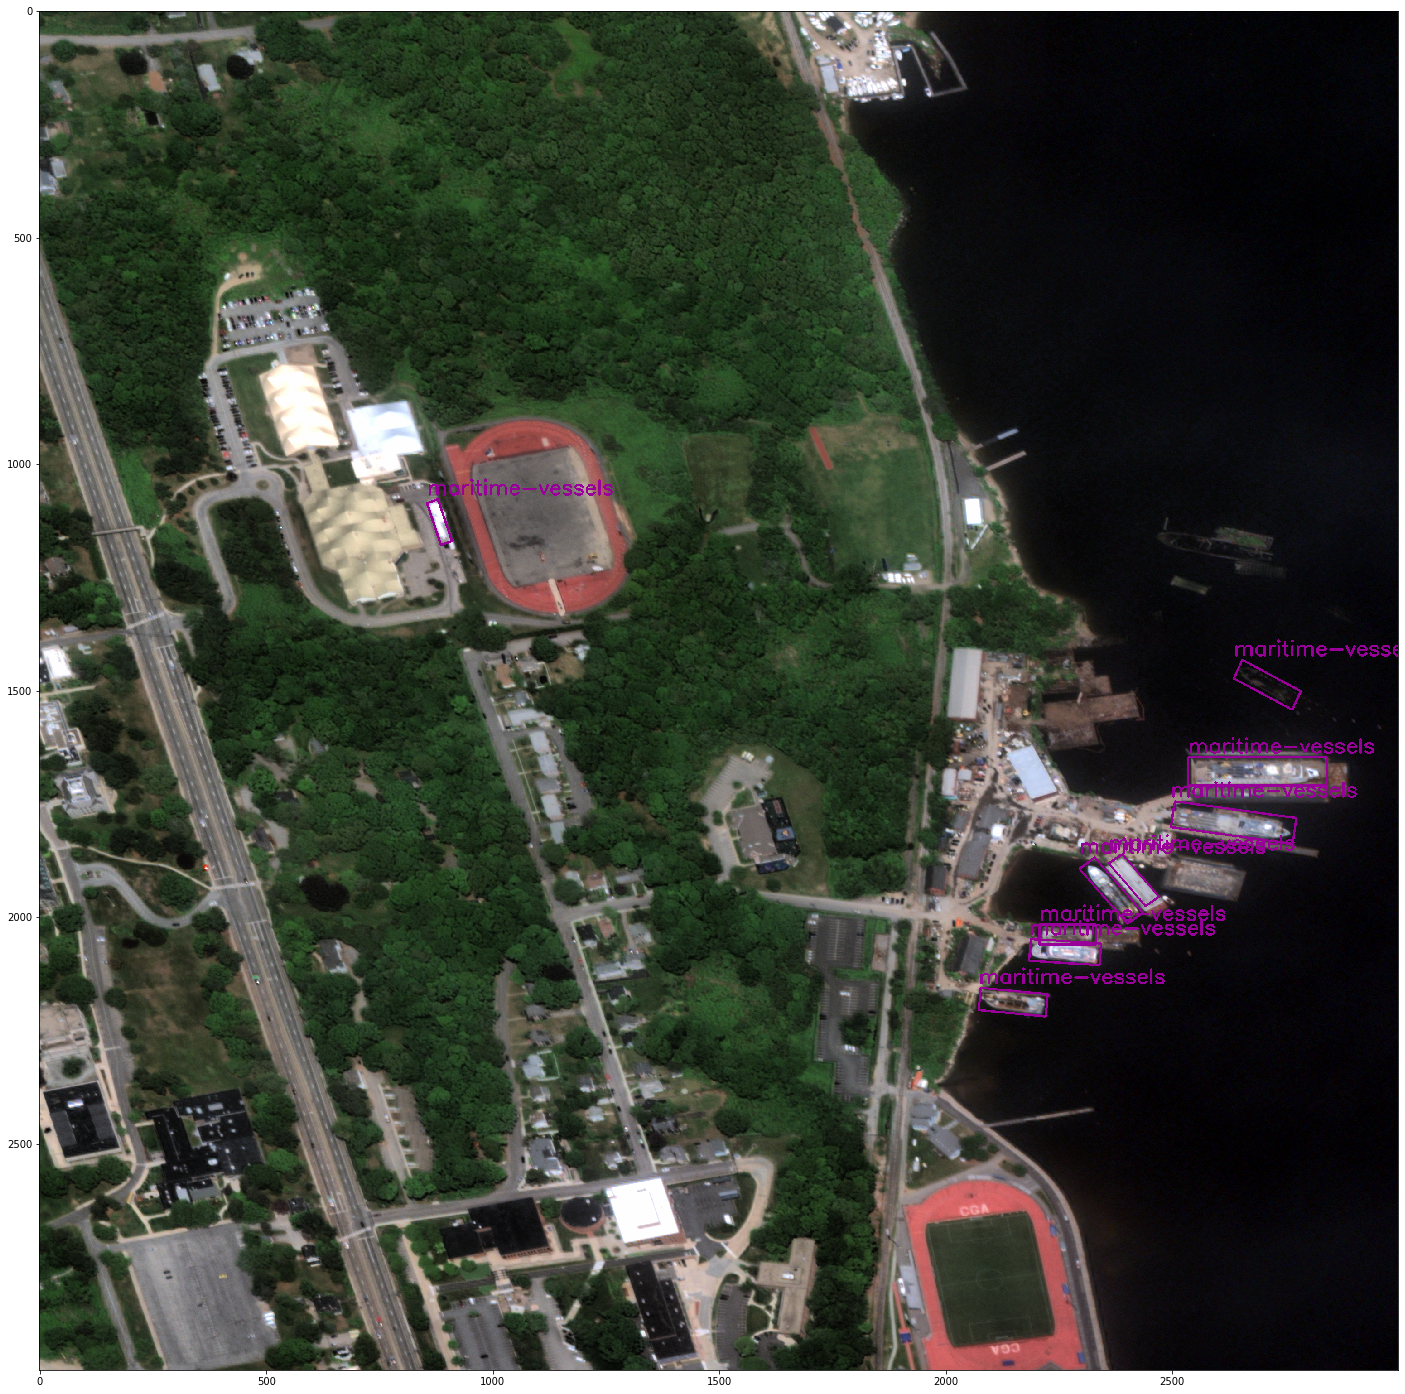

In [44]:
img_num = 1
img = df['file_name'].unique()[img_num]
img_path = 'D:/Learning/Satelite-object-detection/testsets/' + img
image = cv2.imread(img_path)
image = image[:, :, ::-1]
src_image = image.copy()
classes = ['container', 'oil-tanker', 'aircraft-carrier', 'maritime-vessels']
colors = [(153,0,0), (0,153,0), (0,0,153), (153,0,153)]

for i in list(df[df.file_name == img].index):
    quadrangle = np.array([df['point1_x'][i], df['point1_y'][i], df['point2_x'][i], df['point2_y'][i],
                          df['point3_x'][i], df['point3_y'][i], df['point4_x'][i], df['point4_y'][i]])
    
    cv2.drawContours(src_image, [quadrangle.astype(np.int32).reshape((4, 2))], -1, colors[df['class_id'][i] - 1], 4)
    cv2.putText(src_image, classes[df['class_id'][i]-1], (int(min(df['point1_x'][i], df['point2_x'][i], df['point3_x'][i], df['point4_x'][i])),
                int(min(df['point1_y'][i], df['point2_y'][i], df['point3_y'][i], df['point4_y'][i]))-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, colors[int(df['class_id'][i]) -1], 4)

    
cv2.imwrite('D:/Learning/Satelite-object-detection/testsets/0318_nms03/' +img, src_image[:, :, ::-1])
plt.figure(figsize=(25, 25))
plt.imshow(src_image)

In [59]:
img_list = list(df['file_name'].unique())
img_list

['0.png',
 '1.png',
 '10.png',
 '100.png',
 '1000.png',
 '1001.png',
 '1002.png',
 '1004.png',
 '1005.png',
 '1006.png',
 '1007.png',
 '1008.png',
 '1009.png',
 '101.png',
 '1010.png',
 '1011.png',
 '1012.png',
 '1013.png',
 '1014.png',
 '1015.png',
 '1017.png',
 '1018.png',
 '1019.png',
 '102.png',
 '1020.png',
 '1021.png',
 '1022.png',
 '1023.png',
 '1024.png',
 '1025.png',
 '1026.png',
 '1027.png',
 '1028.png',
 '1029.png',
 '103.png',
 '1030.png',
 '1032.png',
 '1033.png',
 '1034.png',
 '1035.png',
 '1036.png',
 '1037.png',
 '1038.png',
 '1039.png',
 '104.png',
 '1040.png',
 '1041.png',
 '1043.png',
 '1044.png',
 '1045.png',
 '1046.png',
 '1047.png',
 '1049.png',
 '105.png',
 '1050.png',
 '1051.png',
 '1052.png',
 '1053.png',
 '1054.png',
 '1055.png',
 '1056.png',
 '1057.png',
 '1058.png',
 '1059.png',
 '106.png',
 '1060.png',
 '1061.png',
 '1062.png',
 '1063.png',
 '1064.png',
 '1065.png',
 '1066.png',
 '1067.png',
 '1069.png',
 '107.png',
 '1070.png',
 '1071.png',
 '1072.png',
 '

In [62]:
for img in img_list:
    
    img_path = 'D:/Learning/Satelite-object-detection/testsets/' + img
    image = cv2.imread(img_path)
    image = image[:, :, ::-1]
    src_image = image.copy()
    classes = ['container', 'oil-tanker', 'aircraft-carrier', 'maritime-vessels']
    colors = [(153,0,0), (0,153,0), (0,0,153), (153,0,153)]

    for i in list(df[df.file_name == img].index):
        quadrangle = np.array([df['point1_x'][i], df['point1_y'][i], df['point2_x'][i], df['point2_y'][i],
                              df['point3_x'][i], df['point3_y'][i], df['point4_x'][i], df['point4_y'][i]])
        
        min_x = int(min(df['point1_x'][i], df['point2_x'][i], df['point3_x'][i], df['point4_x'][i]))
        min_y = int(min(df['point1_y'][i], df['point2_y'][i], df['point3_y'][i], df['point4_y'][i])) -10
        confidence =  df['confidence'][i]

        cv2.drawContours(src_image, [quadrangle.astype(np.int32).reshape((4, 2))], -1, colors[df['class_id'][i] - 1], 4)
        cv2.putText(src_image, str(confidence), (min_x, min_y), cv2.FONT_HERSHEY_SIMPLEX, 1, colors[int(df['class_id'][i]) -1], 2)

    cv2.imwrite('D:/Learning/Satelite-object-detection/testsets/0319_nms03/' +img, src_image[:, :, ::-1])

In [56]:
list(df[df['class_id'] == 3]['file_name'])

['0.png',
 '1018.png',
 '1019.png',
 '1033.png',
 '1033.png',
 '1033.png',
 '1033.png',
 '1049.png',
 '1049.png',
 '1052.png',
 '1058.png',
 '106.png',
 '1062.png',
 '1062.png',
 '1062.png',
 '1063.png',
 '107.png',
 '1102.png',
 '1105.png',
 '1105.png',
 '1125.png',
 '1125.png',
 '1129.png',
 '1131.png',
 '1131.png',
 '1131.png',
 '1131.png',
 '1131.png',
 '1131.png',
 '1132.png',
 '1142.png',
 '1142.png',
 '1142.png',
 '1142.png',
 '1142.png',
 '1142.png',
 '1162.png',
 '1162.png',
 '1162.png',
 '1162.png',
 '1168.png',
 '1171.png',
 '1171.png',
 '1171.png',
 '1176.png',
 '1177.png',
 '119.png',
 '1211.png',
 '1212.png',
 '145.png',
 '145.png',
 '146.png',
 '148.png',
 '152.png',
 '158.png',
 '158.png',
 '158.png',
 '158.png',
 '158.png',
 '159.png',
 '159.png',
 '159.png',
 '159.png',
 '159.png',
 '159.png',
 '159.png',
 '160.png',
 '160.png',
 '160.png',
 '160.png',
 '160.png',
 '164.png',
 '164.png',
 '164.png',
 '164.png',
 '164.png',
 '164.png',
 '165.png',
 '165.png',
 '165.png